In [5]:

from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [6]:
cancer = pd.read_csv('BreastCancer.csv',index_col='Code')
lbl = LabelEncoder()
cancer['Class'] = lbl.fit_transform(cancer['Class'])
X = cancer.drop('Class',axis=1)
y = cancer['Class']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23, stratify=y)

In [8]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_prob = lr.predict_proba(X_test)[:,1]

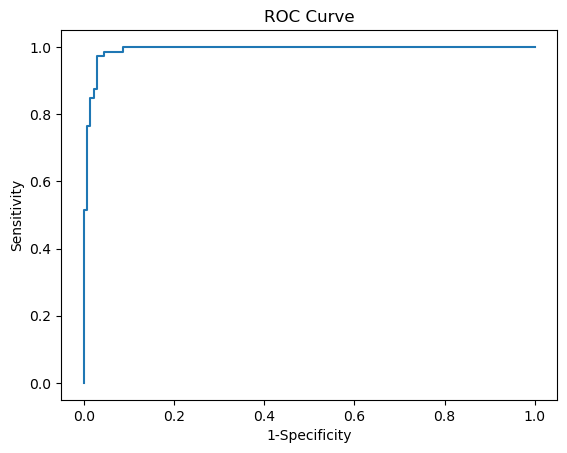

In [9]:
fpr, tpr, thres = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.ylabel("Sensitivity")
plt.xlabel("1-Specificity")
plt.show()

In [10]:
###AUC
print(roc_auc_score(y_test, y_pred_prob))

0.9917471819645732


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=23)

penalty = ['l1','l2','elasticnet','None']
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
params = {'penalty':penalty,'solver':solver}
gcv = GridSearchCV(lr,param_grid=params,cv=kfold,scoring='roc_auc')
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'penalty': 'l2', 'solver': 'lbfgs'}
0.9938674854796193


/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 116